In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
# Rossler Attractor equations
dt = 0.01

def s_prime(prev_val, coeffs):
    return - coeffs["g1"]*prev_val["s"]*prev_val["i"]

def e_prime(prev_val, coeffs):
    return coeffs["g1"]*prev_val["s"]*prev_val["i"] - coeffs["g2"]*prev_val["e"]

def i_prime(prev_val, coeffs):
    return coeffs["g2"]*prev_val["e"] - coeffs["a"]*prev_val["i"]

def r_prime(prev_val, coeffs):
    return coeffs["a"]*prev_val["i"]

ode = {"s": s_prime, "e": e_prime, "i": i_prime, "r": r_prime}

# Initial conditions [0,0,0]
ode_init = {"s": 0.1, "e": 0.9, "i": 0, "r": 0}

# Constants (Parameters)
ode_coeffs = {"a": 0.1, "g1": 0.3, "g2": 0.2}


# 4th Order Runge-Kutta - Data Generation

In [4]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(1000)

In [5]:
result

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9820e-01, 1.7973e-03, 8.9910e-07],
        [9.9999e-02, 8.9641e-01, 3.5892e-03, 3.5928e-06],
        ...,
        [3.3031e-02, 1.5079e-01, 4.4694e-01, 3.6924e-01],
        [3.2987e-02, 1.5053e-01, 4.4679e-01, 3.6969e-01],
        [3.2943e-02, 1.5028e-01, 4.4664e-01, 3.7014e-01]],
       grad_fn=<StackBackward>)

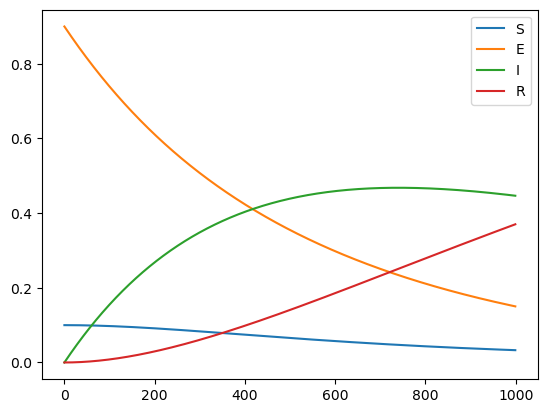

In [6]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(result_np[:,0])
plt.plot(result_np[:,1])
plt.plot(result_np[:,2])
plt.plot(result_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

# Euler's method for training

In [7]:
ode_train_coeffs = {"a": 0., "g1": 0., "g2": 0.}

ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

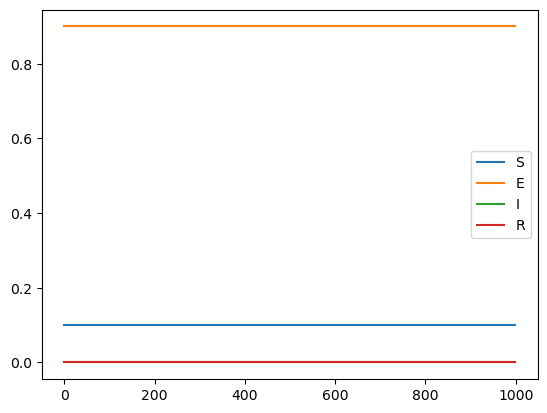

In [8]:
results_test = ode_solver(1000)
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(results_test_np[:,0])
plt.plot(results_test_np[:,1])
plt.plot(results_test_np[:,2])
plt.plot(results_test_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

In [9]:
ode_solver.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.01},
    max_epochs=10
)

Epoch: 0	 Loss: tensor(4.8288e-08, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0269, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1074, requires_grad=True), 'g2': Parameter containing:
tensor(0.0953, requires_grad=True)}
Epoch: 1	 Loss: tensor(2.0655e-09, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0900, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1667, requires_grad=True), 'g2': Parameter containing:
tensor(0.1534, requires_grad=True)}
Epoch: 2	 Loss: tensor(2.1113e-09, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0938, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1603, requires_grad=True), 'g2': Parameter containing:
tensor(0.1875, requires_grad=True)}
Epoch: 3	 Loss: tensor(1.7395e-09, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0977, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1045, requires_grad=True), 'g2': Parameter containing:
tensor(0.1947, r

In [10]:
ode_solver.get_coeffs()

# "a" and "g2" match. "g1" is off, but the difference it makes on the trajectories is not noticeable

{'a': 0.09896983206272125,
 'g1': 0.17932915687561035,
 'g2': 0.19646891951560974}

# Re-calculate using 4th Order Runge-Kutta

In [11]:
ode_solver(10000)

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9823e-01, 1.7682e-03, 0.0000e+00],
        [1.0000e-01, 8.9647e-01, 3.5312e-03, 1.7500e-06],
        ...,
        [1.6836e-02, 4.9285e-06, 1.6826e-04, 9.8299e-01],
        [1.6836e-02, 4.9239e-06, 1.6810e-04, 9.8299e-01],
        [1.6836e-02, 4.9193e-06, 1.6795e-04, 9.8299e-01]],
       grad_fn=<StackBackward>)

In [12]:
results_test = ode_solver(1000)
results_test

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9823e-01, 1.7682e-03, 0.0000e+00],
        [1.0000e-01, 8.9647e-01, 3.5312e-03, 1.7500e-06],
        ...,
        [5.2090e-02, 1.4850e-01, 4.3960e-01, 3.5981e-01],
        [5.2049e-02, 1.4825e-01, 4.3946e-01, 3.6024e-01],
        [5.2008e-02, 1.4800e-01, 4.3932e-01, 3.6068e-01]],
       grad_fn=<StackBackward>)

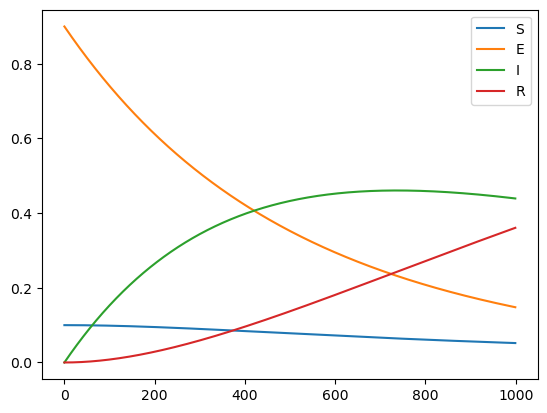

In [13]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(results_test_np[:,0])
plt.plot(results_test_np[:,1])
plt.plot(results_test_np[:,2])
plt.plot(results_test_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()